In [1]:
import os
os.chdir(r"G:\Ddrive\PG DBDA\12 Practical Machine Learning_\Datasets")

In [2]:
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', sep = '\t')

X = dataset[['Review']]
y = dataset['Liked']

In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2022,
                                                    stratify=y)



In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 700

In [5]:
training_sentences = X_train['Review'].tolist()
testing_sentences = X_test['Review'].tolist()
training_labels = y_train
testing_labels = y_test


In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
22/22 - 9s - loss: 0.6936 - accuracy: 0.4886 - val_loss: 0.6931 - val_accuracy: 0.5000 - 9s/epoch - 387ms/step
Epoch 2/30
22/22 - 0s - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000 - 456ms/epoch - 21ms/step
Epoch 3/30
22/22 - 0s - loss: 0.6926 - accuracy: 0.6257 - val_loss: 0.6927 - val_accuracy: 0.5467 - 472ms/epoch - 21ms/step
Epoch 4/30
22/22 - 0s - loss: 0.6925 - accuracy: 0.5114 - val_loss: 0.6923 - val_accuracy: 0.5000 - 455ms/epoch - 21ms/step
Epoch 5/30
22/22 - 0s - loss: 0.6912 - accuracy: 0.5286 - val_loss: 0.6917 - val_accuracy: 0.5000 - 447ms/epoch - 20ms/step
Epoch 6/30
22/22 - 0s - loss: 0.6896 - accuracy: 0.5043 - val_loss: 0.6908 - val_accuracy: 0.5200 - 457ms/epoch - 21ms/step
Epoch 7/30
22/22 - 0s - loss: 0.6873 - accuracy: 0.7814 - val_loss: 0.6891 - val_accuracy: 0.7467 - 454ms/epoch - 21ms/step
Epoch 8/30
22/22 - 0s - loss: 0.6837 - accuracy: 0.7400 - val_loss: 0.6870 - val_accuracy: 0.6833 - 446ms/epoch - 20ms/step
Epoch 9/30

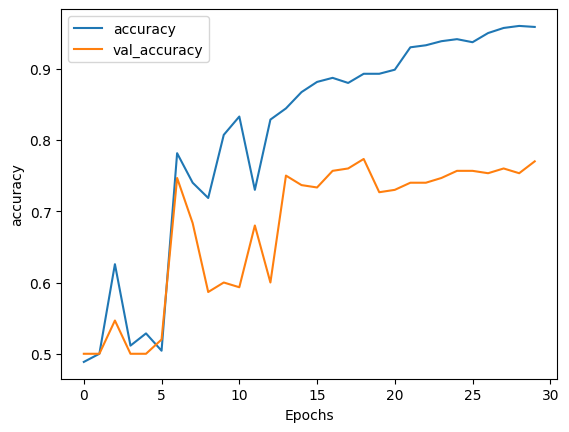

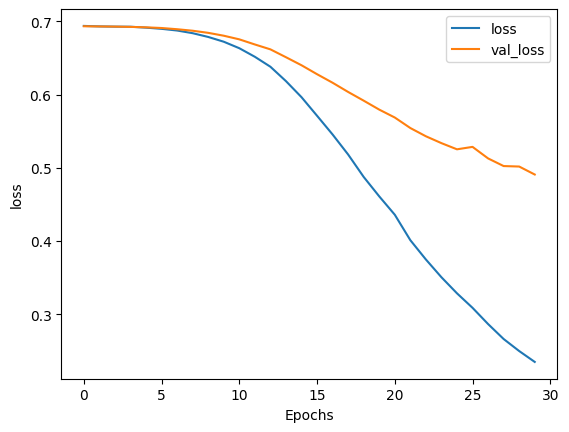

In [9]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")